# Reading Time Series Data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Nifty_daily_close_2023.csv")

In [5]:
data.shape

(224, 6)

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-02 05:30:00,18131.70,18215.15,18086.50,18197.45,0
1,2023-01-03 05:30:00,18163.20,18251.95,18149.80,18232.55,0
2,2023-01-04 05:30:00,18230.65,18243.00,18020.60,18042.95,0
3,2023-01-05 05:30:00,18101.95,18120.30,17892.60,17992.15,0
4,2023-01-06 05:30:00,18008.05,18047.40,17795.55,17859.45,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    224 non-null    object 
 1   Open    224 non-null    float64
 2   High    224 non-null    float64
 3   Low     224 non-null    float64
 4   Close   224 non-null    float64
 5   Volume  224 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 10.6+ KB


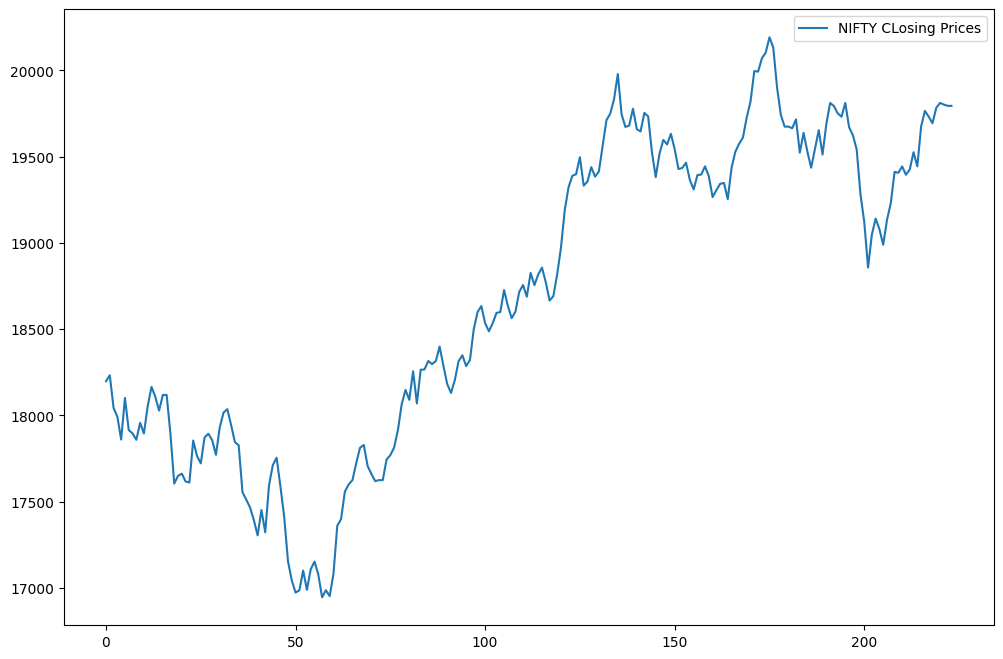

In [8]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['Close'], label='NIFTY CLosing Prices')
plt.legend(loc='best')
plt.show()

In [13]:
data_shuffled = data.sample(len(data))

In [14]:
data_shuffled.shape, data.shape

((224, 6), (224, 6))

In [18]:
data.head(10)

,Date,Open,High,Low,Close,Volume
0,2023-01-02 05:30:00,18131.70,18215.15,18086.50,18197.45,0
1,2023-01-03 05:30:00,18163.20,18251.95,18149.80,18232.55,0
2,2023-01-04 05:30:00,18230.65,18243.00,18020.60,18042.95,0
3,2023-01-05 05:30:00,18101.95,18120.30,17892.60,17992.15,0
4,2023-01-06 05:30:00,18008.05,18047.40,17795.55,17859.45,0
5,2023-01-09 05:30:00,17952.55,18141.40,17936.15,18101.20,0
6,2023-01-10 05:30:00,18121.30,18127.60,17856.00,17914.15,0
7,2023-01-11 05:30:00,17924.25,17976.35,17824.35,17895.70,0
8,2023-01-12 05:30:00,17920.85,17945.80,17761.65,17858.20,0
9,2023-01-13 05:30:00,17867.50,17999.35,17774.25,17956.60,0


In [17]:
data_shuffled

,Date,Open,High,Low,Close,Volume
122,2023-07-03 05:30:00,19246.50,19345.10,19234.40,19322.55,0
223,2023-11-24 05:30:00,19809.60,19832.85,19768.85,19794.70,0
218,2023-11-20 05:30:00,19731.15,19756.45,19670.50,19694.00,0
7,2023-01-11 05:30:00,17924.25,17976.35,17824.35,17895.70,0
41,2023-03-01 05:30:00,17360.10,17467.75,17345.25,17450.90,0
...,...,...,...,...,...,...
163,2023-08-30 05:30:00,19433.45,19452.80,19334.75,19347.45,0
217,2023-11-17 05:30:00,19674.75,19806.00,19667.45,19731.80,0
170,2023-09-08 05:30:00,19774.80,19867.15,19727.05,19819.95,0
134,2023-07-19 05:30:00,19802.95,19851.70,19727.45,19833.15,0


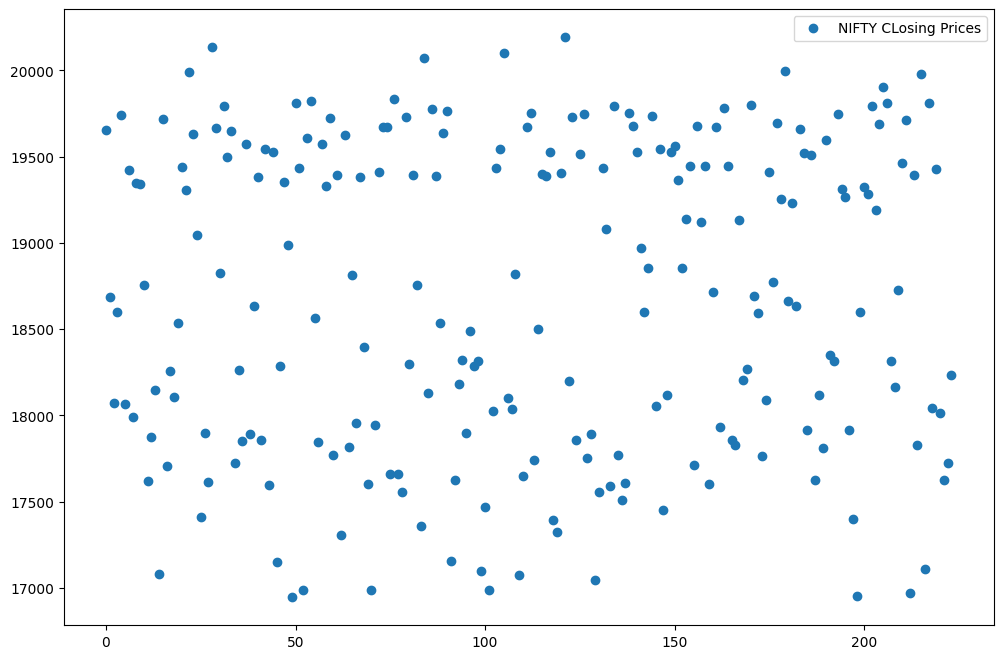

In [16]:
plt.figure(figsize=(12,8))

plt.plot(data_shuffled.index, data['Close'], 'o', label='NIFTY CLosing Prices')
plt.legend(loc='best')
plt.show()

In [9]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [22]:
# Short term exponential moving average (12-day period)
ShortEMA = data['Close'].ewm(span=12, adjust=False).mean()

# Long term exponential moving average (26-day period)
LongEMA = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line
MACD = ShortEMA - LongEMA

# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

data['MACD'] = MACD
data['Signal Line'] = signal


In [24]:
data

,Date,Open,High,Low,Close,Volume,MACD,Signal Line
0,2023-01-02 05:30:00,18131.70,18215.15,18086.50,18197.45,0,0.000000,0.000000
1,2023-01-03 05:30:00,18163.20,18251.95,18149.80,18232.55,0,2.800000,0.560000
2,2023-01-04 05:30:00,18230.65,18243.00,18020.60,18042.95,0,-10.162963,-1.584593
3,2023-01-05 05:30:00,18101.95,18120.30,17892.60,17992.15,0,-24.255735,-6.118821
4,2023-01-06 05:30:00,18008.05,18047.40,17795.55,17859.45,0,-45.606417,-14.016340
...,...,...,...,...,...,...,...,...
219,2023-11-21 05:30:00,19770.90,19829.10,19754.05,19783.40,0,67.677114,4.326997
220,2023-11-22 05:30:00,19784.00,19825.55,19703.85,19811.85,0,81.166952,19.694988
221,2023-11-23 05:30:00,19828.45,19875.15,19786.75,19802.00,0,90.025178,33.761026
222,2023-11-24 05:30:00,19809.60,19832.85,19768.85,19794.70,0,95.357120,46.080245


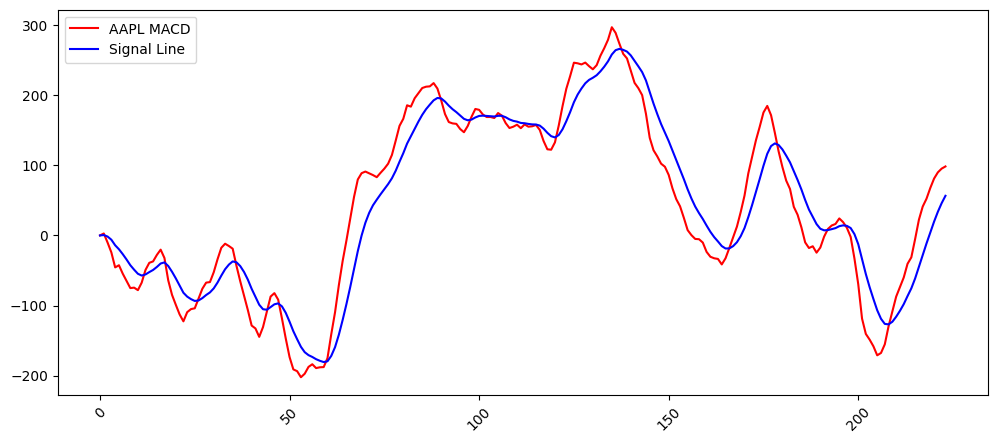

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(data['MACD'], label='AAPL MACD', color = 'red')
plt.plot(data['Signal Line'], label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         224 non-null    object 
 1   Open         224 non-null    float64
 2   High         224 non-null    float64
 3   Low          224 non-null    float64
 4   Close        224 non-null    float64
 5   Volume       224 non-null    int64  
 6   MACD         224 non-null    float64
 7   Signal Line  224 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 14.1+ KB


# Convert the object to datetime format

The format depends on your data. Here are a few examples

    1/12/2001: %d/%m/%Y
    2001/12/1: %Y/%m/%d
    2001-12-01: %Y-%m-%d
    2001-12-01 09:00: %Y-%m-%d %H:%M

In [27]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [28]:
data.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                  int64
MACD                  float64
Signal Line           float64
dtype: object

In [29]:
data

,Date,Open,High,Low,Close,Volume,MACD,Signal Line
0,2023-01-02 05:30:00,18131.70,18215.15,18086.50,18197.45,0,0.000000,0.000000
1,2023-01-03 05:30:00,18163.20,18251.95,18149.80,18232.55,0,2.800000,0.560000
2,2023-01-04 05:30:00,18230.65,18243.00,18020.60,18042.95,0,-10.162963,-1.584593
3,2023-01-05 05:30:00,18101.95,18120.30,17892.60,17992.15,0,-24.255735,-6.118821
4,2023-01-06 05:30:00,18008.05,18047.40,17795.55,17859.45,0,-45.606417,-14.016340
...,...,...,...,...,...,...,...,...
219,2023-11-21 05:30:00,19770.90,19829.10,19754.05,19783.40,0,67.677114,4.326997
220,2023-11-22 05:30:00,19784.00,19825.55,19703.85,19811.85,0,81.166952,19.694988
221,2023-11-23 05:30:00,19828.45,19875.15,19786.75,19802.00,0,90.025178,33.761026
222,2023-11-24 05:30:00,19809.60,19832.85,19768.85,19794.70,0,95.357120,46.080245


In [30]:
data['Date'].min(), data['Date'].max()

(Timestamp('2023-01-02 05:30:00'), Timestamp('2023-11-24 05:30:00'))

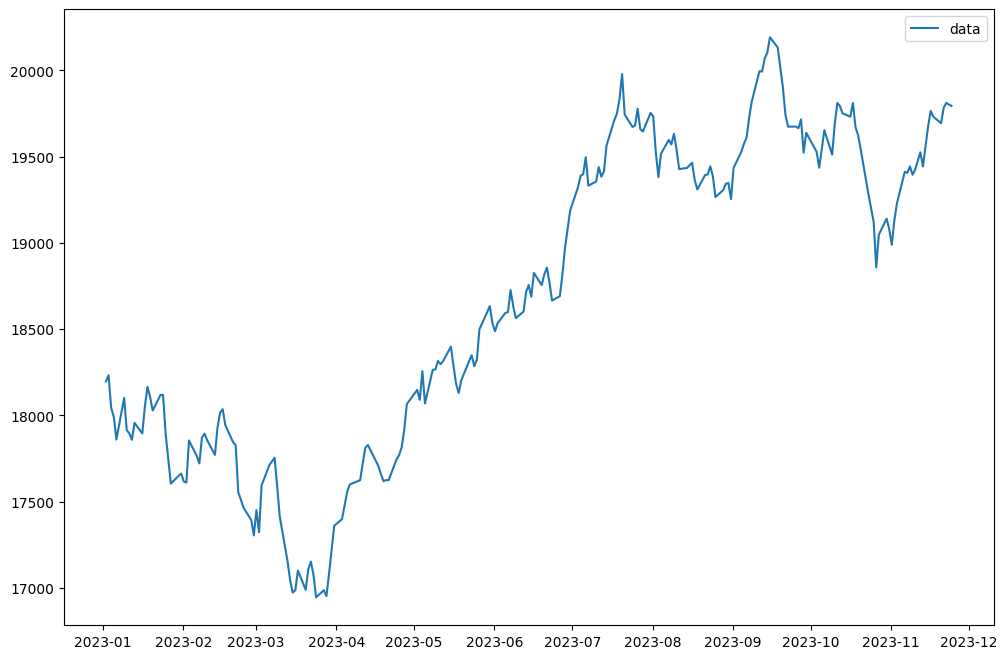

In [32]:
plt.figure(figsize=(12,8))

plt.plot(data['Date'], data['Close'], label='data')
plt.legend(loc='best')
plt.show()

In [44]:
import numpy as np

In [45]:
# Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1

    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    
    return Buy, Sell

# Create buy and sell columns
a = buy_sell(data)
data['Buy_Signal_Price'] = a[0]
data['Sell_Signal_Price'] = a[1]

# Show the data
data.head()

,Date,Open,High,Low,Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
0,2023-01-02 05:30:00,18131.70,18215.15,18086.50,18197.45,0,0.000000,0.000000,NaN,NaN
1,2023-01-03 05:30:00,18163.20,18251.95,18149.80,18232.55,0,2.800000,0.560000,18232.55,NaN
2,2023-01-04 05:30:00,18230.65,18243.00,18020.60,18042.95,0,-10.162963,-1.584593,NaN,18042.95
3,2023-01-05 05:30:00,18101.95,18120.30,17892.60,17992.15,0,-24.255735,-6.118821,NaN,NaN
4,2023-01-06 05:30:00,18008.05,18047.40,17795.55,17859.45,0,-45.606417,-14.016340,NaN,NaN


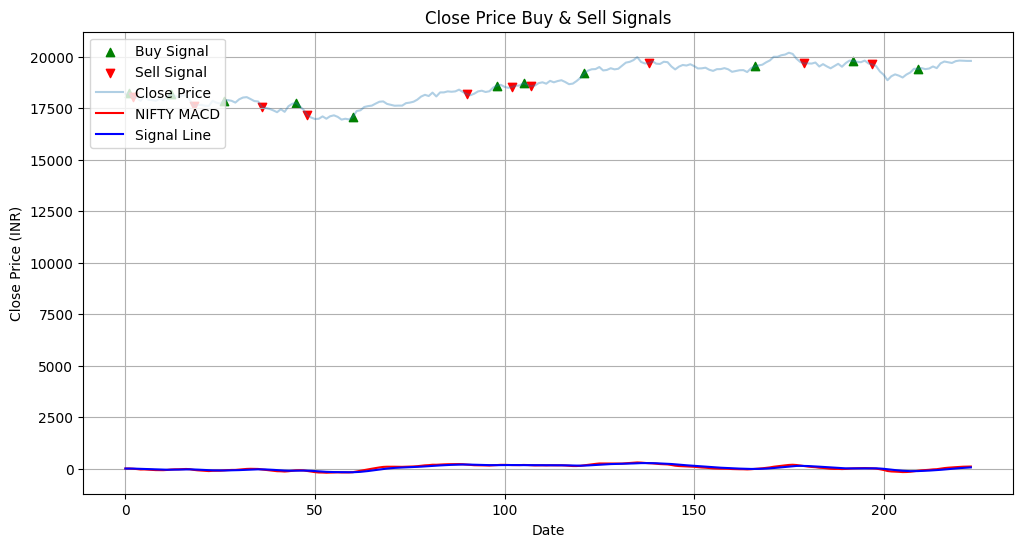

In [49]:
# Plotting the Buy and Sell Signals on the graph

plt.figure(figsize=(12,6))
plt.scatter(data.index, data['Buy_Signal_Price'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(data.index, data['Sell_Signal_Price'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.plot(data['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')


plt.plot(data['MACD'], label='NIFTY MACD', color = 'red')
plt.plot(data['Signal Line'], label='Signal Line', color='blue')

plt.legend(loc='upper left')

plt.grid("on")
plt.show()


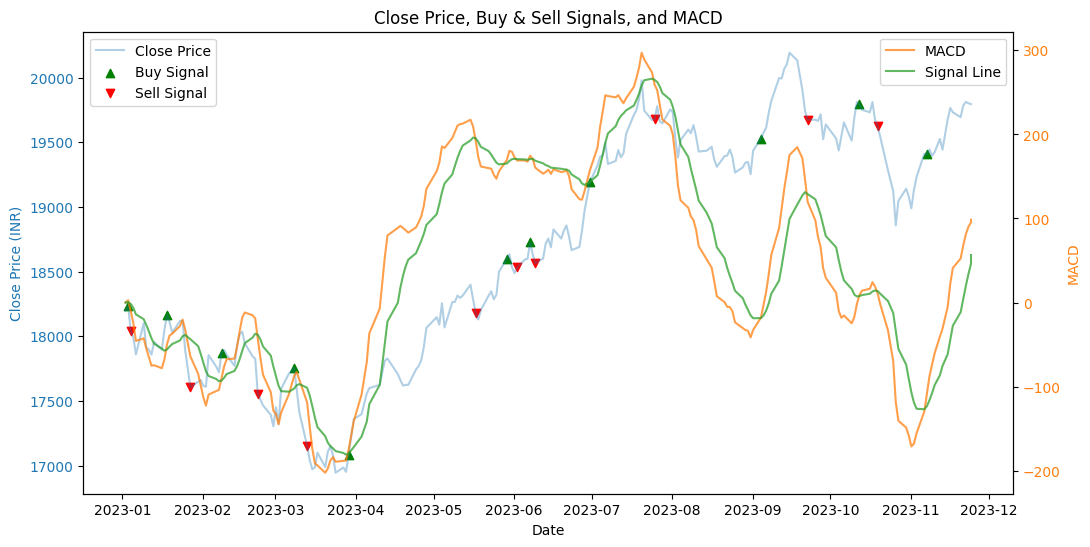

In [52]:
# Creating a plot with MACD lines using the right-hand y-axis

fig, ax1 = plt.subplots(figsize=(12,6))

# Plotting the Close Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (INR)', color='tab:blue')
ax1.plot(data['Date'], data['Close'], label='Close Price', color='tab:blue', alpha=0.35)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plotting Buy and Sell signals
ax1.scatter(data['Date'], data['Buy_Signal_Price'], color='green', label='Buy Signal', marker='^', alpha=1)
ax1.scatter(data['Date'], data['Sell_Signal_Price'], color='red', label='Sell Signal', marker='v', alpha=1)
ax1.legend(loc='upper left')

# Creating a second y-axis for MACD and Signal Line
ax2 = ax1.twinx()  
ax2.set_ylabel('MACD', color='tab:orange') 
ax2.plot(data['Date'], data['MACD'], label='MACD', color='tab:orange', alpha=0.75)
ax2.plot(data['Date'], data['Signal Line'], label='Signal Line', color='tab:green', alpha=0.75)
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# Adding a title
plt.title('Close Price, Buy & Sell Signals, and MACD')

plt.show()


# Challenges with time series data
1. Randomly Shuffled Data
2. Multiple formats of Date

In [37]:
data_shuffled = data.sample(len(data))

In [38]:
data_shuffled.head()

,Date,Open,High,Low,Close,Volume,MACD,Signal Line
118,2023-06-26 05:30:00,18682.35,18722.05,18646.70,18691.20,0,122.940870,146.464192
125,2023-07-06 05:30:00,19385.70,19512.20,19373.00,19497.30,0,246.510422,190.029601
7,2023-01-11 05:30:00,17924.25,17976.35,17824.35,17895.70,0,-64.827744,-34.314584
15,2023-01-23 05:30:00,18118.45,18162.60,18063.45,18118.55,0,-27.818107,-44.985141
107,2023-06-09 05:30:00,18655.90,18676.65,18555.40,18563.40,0,160.350352,168.660963


In [39]:
data_shuffled.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                  int64
MACD                  float64
Signal Line           float64
dtype: object

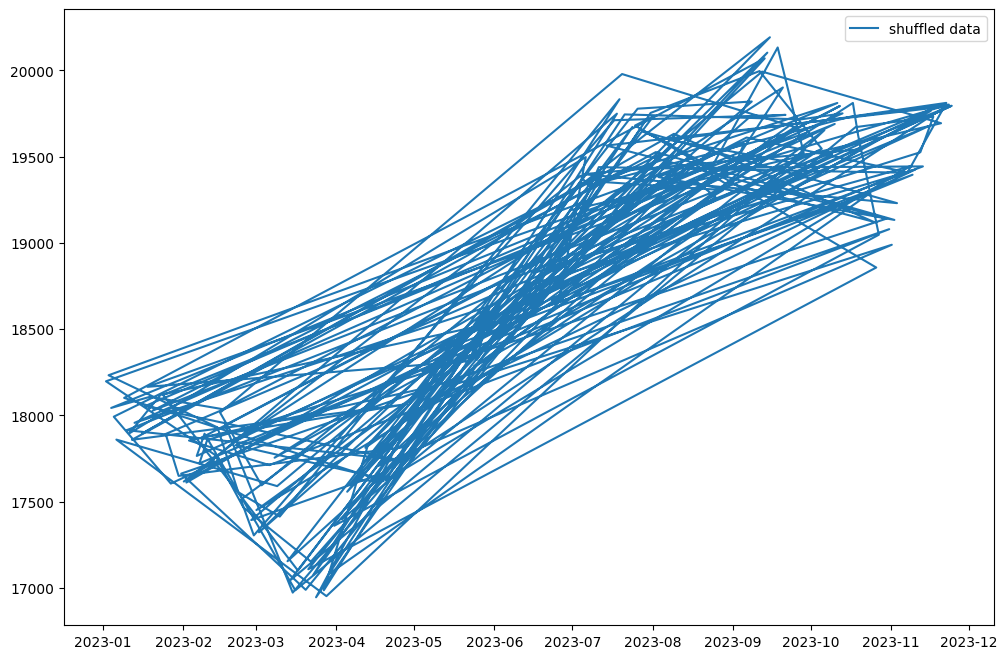

In [41]:
plt.figure(figsize=(12,8))

plt.plot(data_shuffled['Date'], data_shuffled['Close'], label='shuffled data')
plt.legend(loc='best')
plt.show()

- Data observations are randomly shuffled
- Data must be sorted on the 'Date' column

In [42]:
# data_shuffle['Date'] = pd.to_datetime(data_shuffle['Date'], format = '%Y-%m-%d')

In [43]:
from datetime import datetime

def date_format(date_string):
    for fmt in ('%Y-%m-%d', '%Y:%m:%d'):
        try: 
            return datetime.strptime(date_string, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [47]:
for i in range(len(data_shuffle)):
    data_shuffle['Date'][i] = date_format(data_shuffle['Date'][i])

In [60]:
data_shuffle.head()

,Date,count
0,2013-03-23 00:00:00,19
1,2013-03-05 00:00:00,31
2,2013-07-28 00:00:00,41
3,2012-12-27 00:00:00,12
4,2013-07-29 00:00:00,84


In [61]:
data_shuffle['Date'] = pd.to_datetime(data_shuffle['Date'], format = '%Y-%m-%d %H:%M:%s')
data_shuffle.dtypes

Date     datetime64[ns]
count             int64
dtype: object

In [63]:
(data_shuffle.sort_values(by='Date')).head()

,Date,count
113,2012-08-25,3
207,2012-08-26,3
13,2012-08-27,2
501,2012-08-28,2
370,2012-08-29,2


In [64]:
sorted_data = data_shuffle.sort_values(by='Date',ignore_index=True)

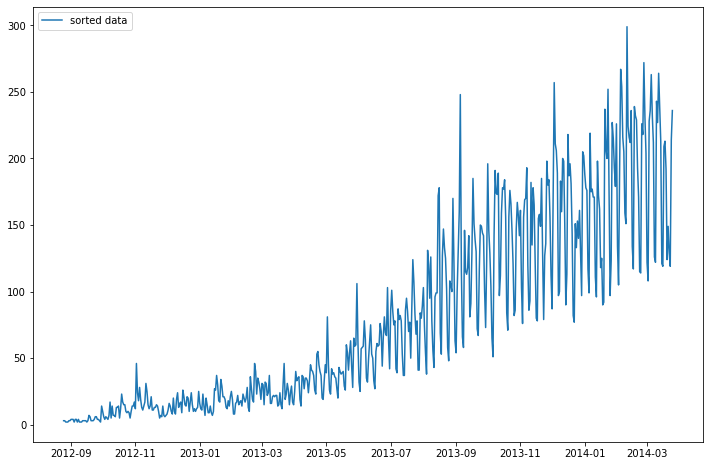

In [65]:
plt.figure(figsize=(12,8))

plt.plot(sorted_data.Date, sorted_data['count'], label='sorted data')
plt.legend(loc='best')
plt.show()